In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [46]:
df1 = pd.read_csv("Doceree_Complete_DataSet\Doceree-HCP_Train.csv", encoding='latin-1')
df2 = pd.read_csv("Doceree_Complete_DataSet\Doceree-HCP_Test.csv", encoding='latin-1')

In [47]:
df1.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1.0
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0.0


In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               113937 non-null  int64  
 1   DEVICETYPE       113937 non-null  object 
 2   PLATFORM_ID      113937 non-null  int64  
 3   BIDREQUESTIP     113937 non-null  object 
 4   USERPLATFORMUID  113933 non-null  object 
 5   USERCITY         107578 non-null  object 
 6   USERZIPCODE      109345 non-null  float64
 7   USERAGENT        113935 non-null  object 
 8   PLATFORMTYPE     113937 non-null  object 
 9   CHANNELTYPE      113937 non-null  object 
 10  URL              113937 non-null  object 
 11  KEYWORDS         113937 non-null  object 
 12  TAXONOMY         32313 non-null   object 
 13  IS_HCP           113936 non-null  float64
dtypes: float64(2), int64(2), object(10)
memory usage: 12.2+ MB


In [49]:
df1['TAXONOMY']

0                NaN
1                NaN
2                NaN
3         2084P0800X
4                NaN
             ...    
113932    207RP1001X
113933    2084P0800X
113934    208000000X
113935    2084P0800X
113936    2084P0800X
Name: TAXONOMY, Length: 113937, dtype: object

In [50]:
df1.isnull().sum()

ID                     0
DEVICETYPE             0
PLATFORM_ID            0
BIDREQUESTIP           0
USERPLATFORMUID        4
USERCITY            6359
USERZIPCODE         4592
USERAGENT              2
PLATFORMTYPE           0
CHANNELTYPE            0
URL                    0
KEYWORDS               0
TAXONOMY           81624
IS_HCP                 1
dtype: int64

In [51]:
print(df1['ID'].value_counts())
print(df1.shape)

#All the ID are Unique

1001      1
76956     1
76967     1
76966     1
76965     1
         ..
38976     1
38975     1
38974     1
38973     1
114937    1
Name: ID, Length: 113937, dtype: int64
(113937, 14)


In [52]:
df1["DEVICETYPE"].value_counts()

#4 categories of Devices

Desktop    78423
Mobile     32065
Tablet      3425
Unknown       24
Name: DEVICETYPE, dtype: int64

In [53]:
column_names = df1.columns

for column in column_names:
    print(df1[column].value_counts())
    print("\n\n\n")

1001      1
76956     1
76967     1
76966     1
76965     1
         ..
38976     1
38975     1
38974     1
38973     1
114937    1
Name: ID, Length: 113937, dtype: int64




Desktop    78423
Mobile     32065
Tablet      3425
Unknown       24
Name: DEVICETYPE, dtype: int64




2     79151
7     20913
9      3891
5      3230
6      2978
10     1037
4       745
14      725
12      544
3       479
8       130
15       42
1        40
13       31
16        1
Name: PLATFORM_ID, dtype: int64




71.105.120.171     1718
142.154.205.202    1143
68.132.98.211       866
108.175.114.100     727
108.175.114.101     707
                   ... 
66.66.9.45            1
97.80.251.36          1
136.32.32.117         1
64.127.133.6          1
108.41.233.175        1
Name: BIDREQUESTIP, Length: 33664, dtype: int64




3e2578c8-f794-41af-a38c-c5cfb3c0f014    1447
d76f7c0b-1a64-4d4b-b36d-86c832be8837    1406
d00f28d6-3a50-46cd-92f3-8601bd57ad0e     675
fcd3d327-0ad5-425e-8ea8-33ffe6a31543     629
fe53f32c-4

In [54]:
column_names = df1.columns

for column in column_names:
    print(column," : ", df1[column].value_counts().count())

ID  :  113937
DEVICETYPE  :  4
PLATFORM_ID  :  15
BIDREQUESTIP  :  33664
USERPLATFORMUID  :  53780
USERCITY  :  4420
USERZIPCODE  :  11278
USERAGENT  :  4288
PLATFORMTYPE  :  5
CHANNELTYPE  :  1
URL  :  5231
KEYWORDS  :  2460
TAXONOMY  :  207
IS_HCP  :  2


In [55]:
df1[(df1["IS_HCP"]==1)]['DEVICETYPE'].value_counts()

Desktop    21262
Mobile     11268
Tablet      1650
Name: DEVICETYPE, dtype: int64

In [56]:
df1[(df1["IS_HCP"]==0)]['DEVICETYPE'].value_counts()

Desktop    57161
Mobile     20796
Tablet      1775
Unknown       24
Name: DEVICETYPE, dtype: int64

In [57]:
df1[(df1["IS_HCP"]==1)]['PLATFORM_ID'].value_counts()

2     24212
7      4155
9      1437
6       946
10      825
14      725
12      544
4       500
3       479
5       216
8        59
15       42
13       31
1         9
Name: PLATFORM_ID, dtype: int64

In [58]:
df1[(df1["IS_HCP"]==0)]['PLATFORM_ID'].value_counts()

2     54939
7     16758
5      3014
9      2453
6      2032
4       245
10      212
8        71
1        31
16        1
Name: PLATFORM_ID, dtype: int64

In [59]:
df1[(df1["IS_HCP"]==1)]['PLATFORMTYPE'].value_counts()

Online Medical Journal      32427
Online Learning Portal        946
Medical News Platform         798
Electronic Health Record        9
Name: PLATFORMTYPE, dtype: int64

In [60]:
df1[(df1["IS_HCP"]==0)]['PLATFORMTYPE'].value_counts()

Online Medical Journal      77692
Online Learning Portal       2032
Electronic Health Record       31
Tele-medicine Platform          1
Name: PLATFORMTYPE, dtype: int64

In [61]:
df2.isnull().sum()

ID                    0
DEVICETYPE            0
PLATFORM_ID           0
BIDREQUESTIP          0
USERPLATFORMUID       0
USERCITY           1559
USERZIPCODE        1115
USERAGENT             1
PLATFORMTYPE          0
CHANNELTYPE           0
URL                   0
KEYWORDS              0
dtype: int64

### Correlation analysis

In [62]:
df1

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1.0
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,114933,Desktop,2,68.82.97.126,051e4a06-4cb4-4b97-b0b1-d1c6a2b8e2c2,Philadelphia,19120.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/consultat...,Cardiovascular|Clinical|False|Male|Oncology|Ps...,207RP1001X,1.0
113933,114934,Desktop,2,104.172.11.109,3289bba5-4a50-4b61-a5cc-68596bbdc2bf,Van Nuys,914014213.0,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/features/...,Asthma|Arthritis|General|Clinical|Diagnosis|Rh...,2084P0800X,1.0
113934,114935,Desktop,7,174.21.94.113,9c36e90c-caa7-4323-8431-fb84f8293972,NaN,98105.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cureus.com/articles/39455-whats-th...,Rehabilitation|Transplantation|Clinical|Preven...,208000000X,1.0
113935,114936,Mobile,2,69.253.129.131,afc27760-31f7-4f6e-aa08-90d8a96525d0,Wilmington,19808.0,Mozilla/5.0 (iPhone; CPU iPhone OS 15_6_1 like...,Online Medical Journal,Website,https://www.dermatologyadvisor.com/home/topics...,pain|disease|autoimmune|multiple sclerosis|gra...,2084P0800X,1.0


C:\Users\Haresh\AppData\Local\Temp\ipykernel_12248\3075832973.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


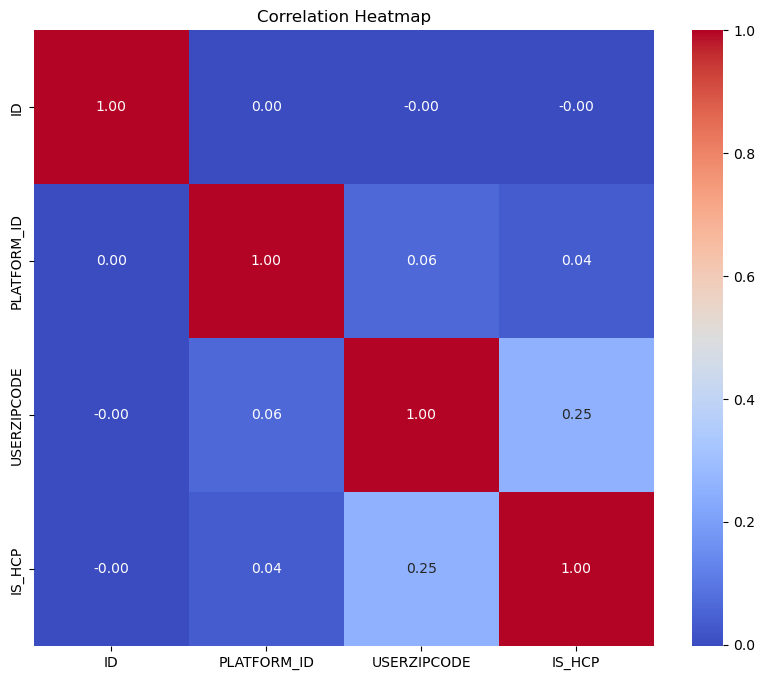

In [63]:

# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Generate a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



### Preprocessing data

In [65]:
def preprocess_ip(ip_address):
    # Convert IP address to binary format
    binary_ip = ''.join([bin(int(x)+256)[3:] for x in ip_address.split('.')])
    
    # Split binary format into 4 octets
    octets = [binary_ip[i:i+8] for i in range(0, len(binary_ip), 8)]
    
    # Normalize octets
    normalized_octets = [float(octet) / 255 for octet in octets]
    
    # Concatenate normalized octets
    return np.array(normalized_octets)


# Preprocess IP addresses in the 'BIDREQUESTIP' column
df1['BIDREQUESTIP'] = df1['BIDREQUESTIP'].apply(preprocess_ip)

In [68]:
print(df1['BIDREQUESTIP'])

0         [39611.80392156863, 39612.160784313724, 0.0, 3...
1         [3921.572549019608, 43180.39215686275, 43572.9...
2         [3921.607843137255, 43533.333333333336, 3925.9...
3         [39219.611764705885, 431.80392156862746, 4357....
4         [39612.19607843137, 43141.21568627451, 43529.8...
                                ...                        
113932    [3921.9607843137255, 3960.823529411765, 4313.7...
113933    [4317.64705882353, 39612.1568627451, 3.9647058...
113934    [39612.19607843137, 39.61176470588235, 3965.13...
113935    [3921.964705882353, 43572.945098039214, 39215....
113936    [4318.0392156862745, 396.08235294117645, 43533...
Name: BIDREQUESTIP, Length: 113937, dtype: object
